In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import numpy as np
import tensorflow as tf
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from matplotlib import patches

In [3]:
df = pd.read_csv('/gdrive/MyDrive/ExDark/train_subset.csv')
df.columns = ['img_names',	'class', 'x_min'	,'x_max',	'y_min',	'y_max']

In [4]:
path = '/gdrive/MyDrive/ExDark/ExDark_SubsetData'
os.chdir(path)

train_labels = []
train_name = []
name = ""
all_labels = []

for i in range(len(df)):
    if(name != df['img_names'].iloc[i]):
      if(i!=0):
        all_labels.append(instance_labels)
      instance_labels = []
      name = df['img_names'].iloc[i]
      train_name.append(name)
      train_labels.append(df['class'].iloc[i])
      instance_labels.append([df['class'].iloc[i],df['x_min'].iloc[i],df['x_max'].iloc[i],df['y_min'].iloc[i],df['y_max'].iloc[i]])
      
    else:
      train_labels.append(df['class'].iloc[i])
      instance_labels.append([df['class'].iloc[i],df['x_min'].iloc[i],df['x_max'].iloc[i],df['y_min'].iloc[i],df['y_max'].iloc[i]])
all_labels.append(instance_labels)

In [5]:
counter = 0
print("Total images = ",len(all_labels),"\n")

for i in range(len(all_labels)):
  vals = len(all_labels[i])
  if(i%50 == 0):
      print(f"Number of instances in image {i} = ",vals)
  counter += vals

print(f"Total instances in {len(all_labels)} images = {counter}")
print(f"Length of csv = ",len(df))

Total images =  1200 

Number of instances in image 0 =  1
Number of instances in image 50 =  2
Number of instances in image 100 =  1
Number of instances in image 150 =  2
Number of instances in image 200 =  5
Number of instances in image 250 =  2
Number of instances in image 300 =  2
Number of instances in image 350 =  2
Number of instances in image 400 =  1
Number of instances in image 450 =  4
Number of instances in image 500 =  2
Number of instances in image 550 =  1
Number of instances in image 600 =  4
Number of instances in image 650 =  2
Number of instances in image 700 =  5
Number of instances in image 750 =  1
Number of instances in image 800 =  1
Number of instances in image 850 =  2
Number of instances in image 900 =  2
Number of instances in image 950 =  10
Number of instances in image 1000 =  3
Number of instances in image 1050 =  5
Number of instances in image 1100 =  2
Number of instances in image 1150 =  3
Total instances in 1200 images = 4367
Length of csv =  4367


In [6]:
all_labels[1]

[['Bicycle', 136, 215, 190, 299],
 ['Bicycle', 219, 282, 172, 303],
 ['Bicycle', 277, 353, 188, 312],
 ['Bicycle', 348, 405, 183, 264],
 ['Car', 316, 349, 171, 197],
 ['Car', 395, 429, 175, 199]]

## Custom Selection Search and IOU implementation

In [7]:
''' 
Function to define regions for each instance of an image
'''
def ss_instance(img, all_labels, nr = 2000):
  img_row , img_col = np.shape(img)[:2]
  regions = []
  x1 = all_labels[1]; w1 = all_labels[2] - all_labels[1]; x2 = all_labels[2]
  y1 = all_labels[3]; h1 = all_labels[4] - all_labels[3]; y2 = all_labels[4]
  for i in range(nr):
    xmin = np.random.randint(max(0, x1 - w1//4), x1 + w1//4)
    xmax = np.random.randint(x2 - w1//4, min(x2 + w1//4,img_col))
    ymin = np.random.randint(max(0, y1 - h1//4), y1 + h1//4)
    ymax = np.random.randint(y2 - h1//4, min(y2 + h1//4,img_row))
    regions.append([xmin,xmax,ymin,ymax]) 
    
  return regions


''' 
Function to define regions for each instance of an image
'''
def ss_random(img, nr = 10):
  img_row , img_col = np.shape(img)[:2]
  regions = []
  for i in range(nr):
    xmin = np.random.randint(0, img_col*3//4)
    xmax = np.random.randint(xmin+10,min(xmin+img_col*4//5,img_col))
    ymin = np.random.randint(0, img_row*3//4)
    ymax = np.random.randint(ymin+10,min(ymin+img_row*4//5,img_row))
    regions.append([xmin,xmax,ymin,ymax])
  return regions

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


136 215 190 299
219 282 172 303
277 353 188 312
348 405 183 264
316 349 171 197
395 429 175 199


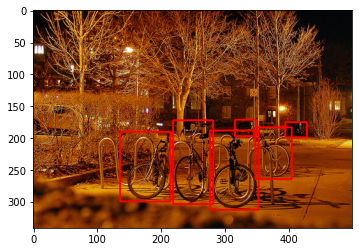

In [8]:
img_nam = '2015_00002.png'
img = plt.imread(img_nam)
ind = 1
for i in df.loc[df.img_names == img_nam].values.tolist():
  xmin, xmax, ymin, ymax = i[2:6]
  print(xmin, xmax, ymin, ymax)
  image = cv2.rectangle(img, (xmin, ymin), (xmax, ymax), 255, 2)
plt.imshow(image)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[122, 231, 192, 300]], [[215, 294, 203, 311]], [[278, 352, 208, 301]], [[340, 418, 196, 250]], [[319, 356, 169, 191]], [[393, 425, 169, 200]]] 6
(341, 500, 3)


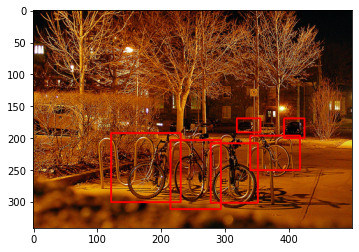

In [9]:
os.chdir(path)
nr = 1
img = plt.imread(img_nam)
sslist = []
for j in range(len(all_labels[1])):
  sslist.append(ss_instance(img, all_labels[1][j], nr))
print(sslist, len(sslist))
for i in range(len(sslist)):
  for j in range(len(sslist[i])):
    img = cv2.rectangle(img,(sslist[i][j][0],sslist[i][j][2]),(sslist[i][j][1],sslist[i][j][3]),(255,0,0),2)
print(np.shape(img))
plt.imshow(img)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


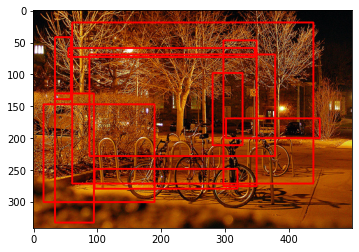

In [10]:
img_nam = '2015_00002.png'
img = plt.imread(img_nam)
arun = ss_random(img,nr = 10)
for i in range(len(arun)):
    xmin, xmax, ymin, ymax = arun[i]
    image = cv2.rectangle(img, (xmin, ymin), (xmax, ymax), 255, 2)
plt.imshow(image)
plt.show() 

In [11]:
'''
Calculates IOU between each result and each instance of an image
'''
def get_iou(b1, b2):
  x_left = max(b1[0], b2[0])
  y_top = max(b1[2], b2[2])
  x_right = min(b1[1], b2[1])
  y_bottom = min(b1[3], b2[3])
  if x_right < x_left or y_bottom < y_top:
      return 0.0
  intersection_area = (x_right - x_left) * (y_bottom - y_top)
  bb1_area = (b1[1] - b1[0]) * (b1[3] - b1[2])
  bb2_area = (b2[1] - b2[0]) * (b2[3] - b2[2])
  iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
  assert iou >= 0.0
  assert iou <= 1.0
  return iou

In [12]:
label_dict = {"Bicycle":0,"Boat":1,"Bottle":2,"Bus":3,"Car":4,"Cat":5,"Chair":6,"Cup":7,"Dog":8,"Motorbike":9,"People":10,"Table":11,"BG":12}

In [ ]:
train_images = []
train_instance_bbox = []
train_actual_bbox = []
train_class = []
IOU = []
for i in range(len(all_labels)):
    nr = 100
    name = path + "/"+ train_name[i]
    image = Image.open(name)
    ssresults = []
    for k in range(len(all_labels[i])):
      ssresults.append(ss_instance(image, all_labels[i][k], nr))
    fin_box = []
    for j in range(np.shape(ssresults)[1]):
      temp1 = []
      for k in range(np.shape(ssresults)[0]):
        temp1.append(ssresults[k][j])
      fin_box.append(temp1)
    imout = image.copy()
    counter = 0 # set actual train image counters
    flag = 0 # net training process
    
    for x,result in enumerate(fin_box):
        if flag == 0:
            for gtval in range(len(fin_box[x])):
                #print(result[gtval], all_labels[i][x][1:])
                iou = get_iou(result[gtval], all_labels[i][gtval][1:])
                if counter < nr:
                    if iou> 0.85: #0.6 good results
                        IOU.append(iou)
                        print(iou)
                        timage = np.array(imout)[result[gtval][2]:result[gtval][3],result[gtval][0]:result[gtval][1],0:3]
                        resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                        train_images.append(np.array(resized))
                        train_instance_bbox.append(result[gtval])
                        train_actual_bbox.append(all_labels[i][gtval][1:])
                        train_class.append(label_dict.get(all_labels[i][gtval][0]))
                        counter += 1
                          
                else :
                     flag = 1

    bg_box = ss_random(image,2)
    for bg in range(len(bg_box)):
        check = True
        for gtval in range(len(all_labels[i])):
            iou = get_iou(bg_box[bg], all_labels[i][gtval][1:])
            if(iou > 0.1):
                check = False
                break
        if(check):
            IOU.append(1-iou)
            timage = np.array(image)[bg_box[bg][2]:bg_box[bg][3],bg_box[bg][0]:bg_box[bg][1],0:3]
            resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
            train_images.append(np.array(resized))
            train_instance_bbox.append(bg_box[bg])
            #train_actual_bbox.append(all_labels[i][gtval][1:])
            train_class.append(label_dict.get("BG"))
    print(f"Finished for img {name}")

Streaming output truncated to the last 5000 lines.
0.8685916322922805
0.8888888888888888
0.8745858968291529
0.8654455794293765
0.8705551291890509
0.8607725321888412
0.8754716981132076
0.8583727034120735
0.8781536161465147
0.8575498575498576
0.8610524053444139
0.8731617647058824
Finished for img /gdrive/MyDrive/ExDark/ExDark_SubsetData/2015_01336.png
0.9157854805822941
0.8669970399441248
0.9002470516944017
0.8614673708034704
0.8542183622828784
0.8858600583090379
0.9018817204301075
0.9070087036188731
Finished for img /gdrive/MyDrive/ExDark/ExDark_SubsetData/2015_01337.png
0.8792175161521896
0.8553928891544667
0.8961015701180076
0.8523049111178066
0.8514664143803217
0.8519968676585747
Finished for img /gdrive/MyDrive/ExDark/ExDark_SubsetData/2015_01338.png
0.852233676975945
0.8883678520255308
0.9224307512361104
0.8505810736026563
0.9056603773584906
0.8615231156214763
Finished for img /gdrive/MyDrive/ExDark/ExDark_SubsetData/2015_01339.png
0.9170674559131828
0.9614704842700601
0.8806932111

In [ ]:
unique_t, counts_t = np.unique(train_class, return_counts=True)
print(label_dict)
print(unique_t,"\n",counts_t)

{'Bicycle': 0, 'Boat': 1, 'Bottle': 2, 'Bus': 3, 'Car': 4, 'Cat': 5, 'Chair': 6, 'Cup': 7, 'Dog': 8, 'Motorbike': 9, 'People': 10, 'Table': 11, 'BG': 12}
[ 0  1  2  3  4  5  6  7  8  9 10 11 12] 
 [ 216  238  303  150  488  128  524  465  149  205 1503  359 1272]


In [ ]:
def preprocess_image_input(input_images):
  input_images = input_images.astype('float32')
  output_ims = tf.keras.applications.resnet50.preprocess_input(input_images)
  return output_ims

In [ ]:
train_images = preprocess_image_input(np.array(train_images))
train_class = np.array(train_class)
IOU = np.array(IOU)
train_instance_bbox = np.array(train_instance_bbox)
train_actual_bbox = np.array(train_actual_bbox)
print(np.shape(train_images),type(train_images),np.shape(train_images[0]))
print(np.shape(train_class),type(train_class),np.shape(train_class[0]))
print(np.shape(IOU),type(IOU),np.shape(IOU[0]))
print(np.shape(train_instance_bbox),type(train_instance_bbox),np.shape(train_instance_bbox[0]))
print(np.shape(train_actual_bbox),type(train_actual_bbox),np.shape(train_actual_bbox[0]))

TRAIN_Y = np.concatenate((np.reshape(train_class,(len(train_class),1)),np.reshape(IOU,(len(IOU),1))),axis = 1)
print(np.shape(TRAIN_Y))

(6000, 224, 224, 3) <class 'numpy.ndarray'> (224, 224, 3)
(6000,) <class 'numpy.ndarray'> ()
(6000,) <class 'numpy.ndarray'> ()
(6000, 4) <class 'numpy.ndarray'> (4,)
(4728, 4) <class 'numpy.ndarray'> (4,)
(6000, 2)


In [ ]:
print(len(train_images))
print(len(train_class))
print(len(IOU))
print(len(train_instance_bbox))
print(len(train_actual_bbox))

6000
6000
6000
6000
4728


In [ ]:
def get_key(dict,val):
  for key, value in dict.items():
    if val == value:
      return key

In [ ]:
from sklearn.model_selection import train_test_split
import keras

## Final Classifier Classifier model

In [ ]:
import tensorflow as tf
from keras.models import load_model

In [ ]:
'''
Feature Extraction is performed by ResNet50 pretrained on imagenet weights. 
Input size is 224 x 224.
'''

def feature_extractor(inputs):

    feature_extractor = tf.keras.applications.resnet.ResNet50(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')(inputs)#weights="/gdrive/MyDrive/ExDark/ModelWeights/Resnet50_COCO_Pretrained_best.h5")(inputs) #
    return feature_extractor


'''
Defines final dense layers and subsequent softmax layer for classification.
'''
def classifier_confidence(inputs):
    x = tf.keras.layers.GlobalAveragePooling2D()(inputs)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(1024, activation="relu")(x)
    x = tf.keras.layers.Dense(512, activation="relu")(x)
    
    x1 = tf.keras.layers.Dense(13, activation="softmax", name="classification")(x)
    x2 = tf.keras.layers.Dense(128, activation="relu")(x)
    x2 = tf.keras.layers.Dense(1, activation="sigmoid", name="confidence")(x2)
    return x1 ,x2

'''
Connect the feature extraction and "classifier" layers to build the model.
'''
def final_model(inputs):

    resnet_feature_extractor = feature_extractor(inputs)
    #class_out = classifier_confidence(resnet_feature_extractor)  
    class_out , conf_out = classifier_confidence(resnet_feature_extractor)

    return class_out, conf_out

'''
Define the model and compile it. 
Use Stochastic Gradient Descent as the optimizer.
Use Sparse Categorical CrossEntropy as the loss function.
'''
def define_compile_model():

    inputs = tf.keras.layers.Input(shape=(224,224,3))
    classification_output, confidence_output = final_model(inputs) 
    model = tf.keras.Model(inputs=inputs, outputs = [classification_output, confidence_output])  
    return model


model = define_compile_model()
model.summary()
model.compile(optimizer='SGD', loss= {"classification": keras.losses.sparse_categorical_crossentropy, "confidence": "mse"}, metrics = {"classification": 'accuracy', "confidence": tf.keras.metrics.RootMeanSquaredError()})

94781440/94765736 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 resnet50 (Functional)          (None, 7, 7, 2048)   23587712    ['input_1[0][0]']                
                                                                                                  
 global_average_pooling2d (Glob  (None, 2048)        0           ['resnet50[0][0]']               
 alAveragePooling2D)                                                                              
                             

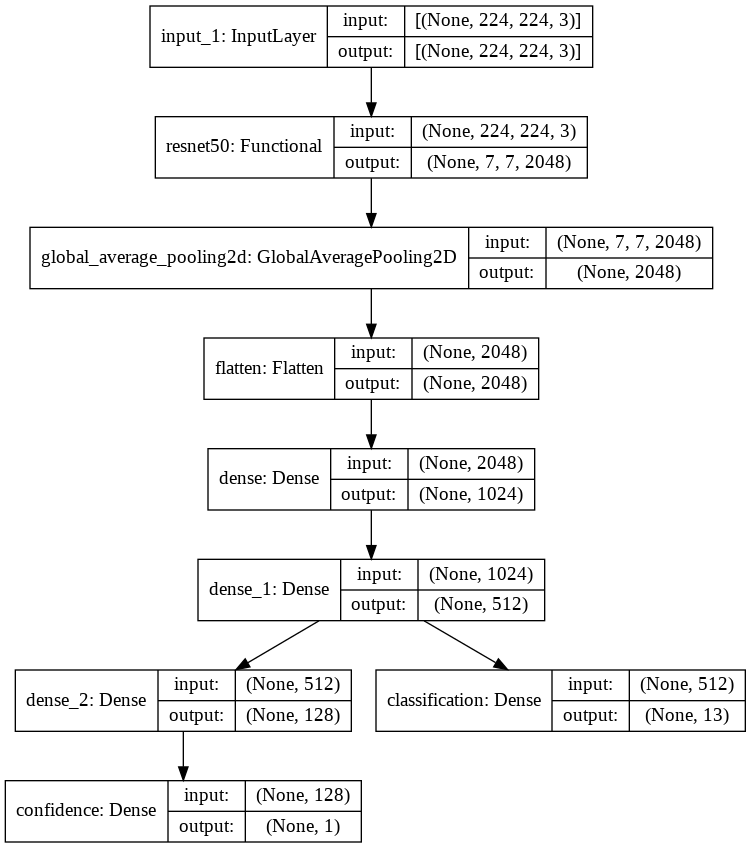

In [ ]:
from tensorflow.python.keras.utils.vis_utils import plot_model
# Plot model graph
os.chdir('/gdrive/MyDrive/ExDark')
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
#TRAIN_Y = tuple((TRAIN_Y[:,0],TRAIN_Y[:,1]))
#TRAIN_Y = tuple((train_class.T, IOU.T))
train_x, test_x, train_y, test_y = train_test_split(train_images, TRAIN_Y,random_state = 10)
train_y = tuple((train_y[:,0],train_y[:,1]))
test_y = tuple((test_y[:,0],test_y[:,1]))
print(type(train_y))
print(np.shape(train_x))
print(len(train_x))
print(len(test_y))

<class 'tuple'>
(4500, 224, 224, 3)
4500
2


In [ ]:
del train_images
del train_class
del IOU

In [ ]:
print(np.shape(train_x))
print(np.shape(train_y))

(4500, 224, 224, 3)
(2, 4500)


In [ ]:
history = model.fit(train_x, train_y, epochs=30,verbose = 1,batch_size = 10,validation_data=(test_x,test_y))

Epoch 1/30
450/450 [==============================] - 179s 397ms/step - loss: 0.0142 - classification_loss: 0.0129 - confidence_loss: 0.0013 - classification_accuracy: 0.9969 - confidence_root_mean_squared_error: 0.0361 - val_loss: 0.4237 - val_classification_loss: 0.4219 - val_confidence_loss: 0.0019 - val_classification_accuracy: 0.9020 - val_confidence_root_mean_squared_error: 0.0432
Epoch 2/30
450/450 [==============================] - 178s 396ms/step - loss: 0.0220 - classification_loss: 0.0207 - confidence_loss: 0.0013 - classification_accuracy: 0.9929 - confidence_root_mean_squared_error: 0.0358 - val_loss: 0.4248 - val_classification_loss: 0.4229 - val_confidence_loss: 0.0019 - val_classification_accuracy: 0.9100 - val_confidence_root_mean_squared_error: 0.0434
Epoch 3/30
450/450 [==============================] - 174s 387ms/step - loss: 0.0148 - classification_loss: 0.0135 - confidence_loss: 0.0013 - classification_accuracy: 0.9962 - confidence_root_mean_squared_error: 0.0356 

In [ ]:
model.save('/gdrive/MyDrive/ExDark/ModelWeights/RawWeightsUltimate_30.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:
ind = np.arange(40)
pred = model.predict(np.array(test_x[ind]))
act_preds = (np.argmax(pred[0],axis=1))
acc = 0
for i in ind:
  act_lab = get_key(label_dict,test_y[0][i])
  pred_lab = get_key(label_dict,act_preds[i])
  #print(f"Predicted Label = {pred_lab} and Expected Label = {act_lab}")
  if(act_lab == pred_lab):
    acc+=1

print("Labelling Accuracy = ",acc/i)

Labelling Accuracy =  0.9230769230769231


In [ ]:
# pred = saved_model.predict(np.array(test_x[ind]))
# act_preds = (np.argmax(pred,axis=1))
# acc = 0
# for i in ind:
#   act_lab = get_key(label_dict,test_y[i])
#   pred_lab = get_key(label_dict,act_preds[i])
#   #print(f"Predicted Label = {pred_lab} and Expected Label = {act_lab}")
#   if(act_lab == pred_lab):
#     acc+=1

# print("Labelling Accuracy = ",acc/i)

In [ ]:
# pred = saved_model.predict(preprocess_image_input(np.array(sample_imgs)))
# act_preds = (np.argmax(pred,axis=1))
# for i in range(len(sample_imgs)):
#     plt.imshow(sample_imgs[i])
#     pred_lab = get_key(label_dict,act_preds[i])
#     tit = f"Predicted Label = {pred_lab} "
#     plt.title(tit)
#     plt.show()

## Load Weights

In [13]:
import tensorflow as tf
from keras.models import load_model

In [14]:
saved_model = load_model('/gdrive/MyDrive/ExDark/ModelWeights/RawWeightsUltimate_30.h5')

In [15]:
def get_key(dict,val):
  for key, value in dict.items():
    if val == value:
      return key

In [ ]:
ind = np.arange(40)
pred = saved_model.predict(np.array(test_x[ind]))
act_preds = (np.argmax(pred[0],axis=1))
acc = 0
for i in ind:
  act_lab = get_key(label_dict,test_y[0][i])
  pred_lab = get_key(label_dict,act_preds[i])
  #print(f"Predicted Label = {pred_lab} and Expected Label = {act_lab}")
  if(act_lab == pred_lab):
    acc+=1

print("Labelling Accuracy = ",acc/i)

## Validating Results

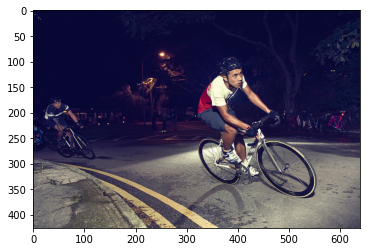

In [126]:
path = '/gdrive/MyDrive/ExDark/ExDark_SubsetData'
os.chdir(path)

img_nam = '2015_00025.png'
img = Image.open(img_nam)
plt.imshow(img)
#ind = 1
# for i in df.loc[df.img_names == img_nam].values.tolist():
#   xmin, xmax, ymin, ymax = i[2:6]
#   print(xmin, xmax, ymin, ymax)
#   image = cv2.rectangle(img, (xmin, ymin), (xmax, ymax), 255, 2)
# plt.imshow(image)
plt.show()

In [127]:
print(np.shape(img))

(426, 640, 3)


In [128]:
regions = ss_random(img,100000)

In [129]:
crop_reg = []
crop_bbox = []
for i in regions:
  for j in range(len(all_labels[24])):
      if(get_iou(i,all_labels[24][j][1:])>0.8):
          crop_bbox.append(i)
          crop_reg.append(cv2.resize(np.array(img)[i[2]:i[3],i[0]:i[1],:3],(224,224)))

In [130]:
all_labels[24]

[['Bicycle', 321, 561, 196, 375],
 ['Bicycle', 36, 132, 212, 300],
 ['Bicycle', 485, 622, 199, 242],
 ['People', 226, 247, 190, 242],
 ['People', 248, 287, 191, 243],
 ['People', 20, 105, 162, 285],
 ['People', 311, 489, 86, 339]]

In [131]:
for i in range(len(crop_reg)):
    plt.imshow(crop_reg[i])
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [132]:
pred = saved_model.predict(np.array(crop_reg))
act_preds = (np.argmax(pred[0],axis=1))
for i in range(len(crop_reg)):
    plt.imshow(crop_reg[i])
    pred_lab = get_key(label_dict,act_preds[i])
    tit = f"Predicted Label = {pred_lab} ;Confidence = {pred[1][i]}"
    plt.title(tit)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [133]:
print(pred[1])

[[0.9041    ]
 [0.89801717]
 [0.8510137 ]
 [0.8917494 ]
 [0.8803677 ]
 [0.8592832 ]
 [0.8898876 ]
 [0.86835337]
 [0.9078106 ]
 [0.90407264]
 [0.87054515]
 [0.9138397 ]
 [0.8873524 ]
 [0.8873823 ]
 [0.8483993 ]
 [0.9039423 ]
 [0.89416593]
 [0.89633006]
 [0.88970804]
 [0.9123446 ]
 [0.907066  ]
 [0.8461064 ]
 [0.8563169 ]
 [0.88909435]
 [0.9103266 ]
 [0.9068531 ]
 [0.89269656]
 [0.8575609 ]
 [0.9029482 ]
 [0.88600045]
 [0.9044017 ]
 [0.8826412 ]
 [0.890965  ]
 [0.8848125 ]
 [0.8886955 ]
 [0.88691396]
 [0.9132722 ]
 [0.8810865 ]
 [0.8875411 ]
 [0.9079776 ]
 [0.8651949 ]
 [0.878076  ]
 [0.90468055]
 [0.9113775 ]
 [0.89289546]
 [0.86847556]
 [0.8801986 ]
 [0.82585293]
 [0.82734513]
 [0.8987521 ]
 [0.8963084 ]
 [0.8491977 ]]


In [134]:
print(crop_bbox)

[[308, 591, 199, 371], [311, 561, 201, 385], [301, 481, 95, 320], [315, 562, 186, 353], [302, 565, 177, 377], [302, 474, 96, 351], [329, 488, 63, 349], [332, 577, 197, 368], [325, 488, 77, 352], [325, 491, 71, 349], [310, 482, 109, 351], [326, 482, 92, 352], [320, 583, 202, 379], [307, 494, 52, 343], [284, 490, 97, 344], [306, 574, 206, 376], [327, 495, 86, 348], [323, 557, 186, 399], [325, 575, 172, 376], [326, 554, 194, 393], [327, 583, 181, 374], [300, 495, 99, 346], [290, 482, 92, 351], [314, 569, 192, 402], [332, 540, 196, 379], [333, 492, 96, 332], [303, 522, 86, 335], [303, 486, 61, 332], [321, 485, 77, 363], [318, 465, 88, 341], [340, 571, 191, 375], [318, 554, 194, 407], [319, 566, 221, 370], [321, 509, 89, 347], [311, 546, 199, 363], [309, 495, 53, 348], [336, 566, 195, 391], [315, 578, 192, 358], [315, 573, 207, 361], [319, 545, 176, 384], [318, 569, 215, 364], [322, 582, 205, 386], [317, 551, 212, 382], [340, 571, 202, 384], [315, 498, 65, 352], [306, 519, 93, 335], [303, 4

In [135]:
def nms(crop_bbox,pred):
    max_conf_bbox = []
    indices_used = []
    max_class = []
    for i in range(len(crop_bbox)):
        temp_bbox = []
        temp_conf = []
        temp_class = []
        if(i not in indices_used):
            indices_used.append(i)
            temp_bbox.append(crop_bbox[i])
            temp_conf.append(pred[1][i])
            temp_class.append(pred[0][i])
            for j in range(i+1,len(crop_bbox)):
                if(j not in indices_used):
                    iou = get_iou(crop_bbox[i],crop_bbox[j])
                    if(iou > 0.5):
                        indices_used.append(j)
                        temp_bbox.append(crop_bbox[j])
                        temp_conf.append(pred[1][j])
                        temp_class.append(pred[0][j])
            max_conf = np.max(temp_conf)
            max_conf_ind = np.argmax(temp_conf)
            max_conf_bbox.append(temp_bbox[max_conf_ind])
            max_class.append(get_key(label_dict,np.argmax(temp_class[max_conf_ind]))) 

    return max_conf_bbox,max_class

In [136]:
output = nms(crop_bbox,pred)

In [137]:
output

([[336, 566, 195, 391], [326, 482, 92, 352], [44, 135, 206, 300]],
 ['Bicycle', 'People', 'Bicycle'])

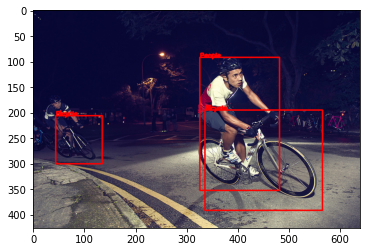

In [138]:
img_nam = '/gdrive/MyDrive/ExDark/ExDark_SubsetData/2015_00025.png'
img = Image.open(img_nam)

for i in range(len(output[0])):
    if(output[1][i] != "BG"):
        img = cv2.rectangle(np.array(img),(output[0][i][1],output[0][i][3]),(output[0][i][0],output[0][i][2]),(255,0,0),2)
        img = cv2.putText(img,str(output[1][i]),(output[0][i][0],output[0][i][2]),fontFace = cv2.FONT_HERSHEY_SIMPLEX,fontScale = 0.4,color = (255, 0, 0),thickness = 2)
plt.imshow(img)
plt.show()

## Perform on Test Images and get mAP


In [ ]:
def mAP(nms_out,gt_lab):
    correct_preds = 0
    thres = 0.50
    
    while(thres<=0.9):
        for i in range(len(nms_out[0])):
            for j in range(len(gt_lab)):
                #print(get_iou(nms_out[0][i],gt_lab[j][1:]))
                if(get_iou(nms_out[0][i],gt_lab[j][1:])>thres):
                    #print(nms_out[1][i],gt_lab[j][0])
                    if(nms_out[1][i] == gt_lab[j][0]):
                        correct_preds += 1

        thres += 0.05
    
    tot_vals = max(len(nms_out[0]),len(gt_lab))*((0.9-0.5)//0.05)
    #print(correct_preds)
    mAP = correct_preds/tot_vals
    #print("mAP for img = ", mAP)

    return mAP

In [ ]:
mAP(output,all_labels[1])

0.4791666666666667

## Perform on first 240 images

In [ ]:
x = np.random.randint(0,1200,size = 240)

In [ ]:
tot_mAP = 0
for n in x:
    img = Image.open(train_name[n])
    gt_val = all_labels[n]
    regions = ss_random(img,100000)

    crop_reg = []
    crop_bbox = []
    for i in regions:
      for j in range(len(gt_val)):
          if(get_iou(i,gt_val[j][1:])>0.7):
              crop_bbox.append(i)
              crop_reg.append(cv2.resize(np.array(img)[i[2]:i[3],i[0]:i[1],:3],(224,224)))

    if(len(crop_reg) > 0):
        pred = saved_model.predict(np.array(crop_reg))
        nms_out = nms(crop_bbox,pred)
        #print(nms_out)
        for i in range(0,len(nms_out[0])):
            if(nms_out[1][i] != "BG"):
                img = cv2.rectangle(np.array(img),(nms_out[0][i][1],nms_out[0][i][3]),(nms_out[0][i][0],nms_out[0][i][2]),(255,0,0),2)
                img = cv2.putText(img,str(nms_out[1][i]),(nms_out[0][i][0],nms_out[0][i][2]),fontFace = cv2.FONT_HERSHEY_SIMPLEX,fontScale = 0.4,color = (255, 0, 0),thickness = 2)
        #plt.imshow(img)
        #plt.show()
        map_score = mAP(nms_out,gt_val)
        print(f"mAP for image {n} = {map_score}")
        tot_mAP += map_score

mAP for image 798 = 0.22916666666666666
mAP for image 428 = 0.625
mAP for image 40 = 0.0
mAP for image 1112 = 0.08928571428571429
mAP for image 919 = 0.0
mAP for image 1035 = 0.15625
mAP for image 400 = 0.625
mAP for image 87 = 0.0
mAP for image 386 = 0.0
mAP for image 994 = 0.6875
mAP for image 270 = 0.2916666666666667
mAP for image 165 = 0.53125
mAP for image 899 = 0.3125
mAP for image 863 = 0.0
mAP for image 306 = 0.0
mAP for image 642 = 0.0
mAP for image 600 = 0.0
mAP for image 194 = 0.0
mAP for image 1184 = 0.75
mAP for image 284 = 0.4
mAP for image 803 = 0.0
mAP for image 655 = 0.0
mAP for image 247 = 0.3125
mAP for image 827 = 0.0
mAP for image 1172 = 0.0
mAP for image 207 = 0.5625
mAP for image 324 = 0.0
mAP for image 1065 = 0.20833333333333334
mAP for image 711 = 0.625
mAP for image 569 = 0.0
mAP for image 19 = 0.625
mAP for image 734 = 0.625
mAP for image 210 = 0.275
mAP for image 1035 = 0.20833333333333334
mAP for image 1135 = 0.125
mAP for image 654 = 0.0
mAP for image 1119

In [ ]:
print(tot_mAP/240)

0.2663140740089868
